# Visualisation

## Setup

In [1]:
import os
import pydicom
import matplotlib.pyplot as plt

In [2]:
def plot_dcm_slices(root, files, num_column=15, jump=1):
    num_slices = len(files)
    num_row = (num_slices//jump + num_column - 1) // num_column
    f, plots = plt.subplots(num_row, num_column, figsize=(10, 6))
    for i in range(0, num_row*num_column):
        plot = plots[i % num_column] if num_row == 1 else plots[i // num_column, i % num_column]        
        plot.axis('off')
        if i < num_slices//jump:
            file = os.path.join(root, files[i*jump])
            ds = pydicom.dcmread(file)
            plot.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone

## Original Data

In [3]:
DATA_PATH = "./data/"
dcmFolders = []
filesLst = []
for root, dirs, files in os.walk(DATA_PATH):
    if (len(files) != 0):
        for file in files:
            if file.endswith("dcm"):
                dcmFolders.append(root)
                filesLst.append(files)
                break

dcmFolders

['./data/LIDC-IDRI\\LIDC-IDRI-0001\\01-01-2000-NA-NA-30178\\3000566.000000-NA-03192']

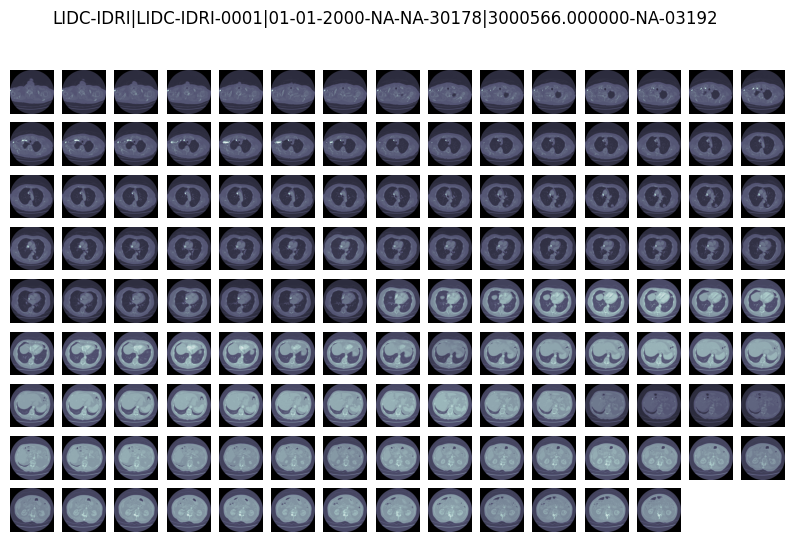

In [4]:
# pop non DICOM file
files = []
for i in filesLst[0]:
    if i.endswith("dcm"):
        files.append(i)

plot_dcm_slices(root=dcmFolders[0], files=files)
plt.suptitle(dcmFolders[0][7:].replace("\\", '|'))
plt.savefig("./imgs/DCMSlices.png", bbox_inches="tight")
plt.show()